In [29]:
import numpy as np
import cv2 as cv
import sys
sys.path.append("../")
from matplotlib import pyplot as plt
from apt.quadtree import FixedQuadTree

(512, 512, 3)
(512, 512, 3)
(512, 512)


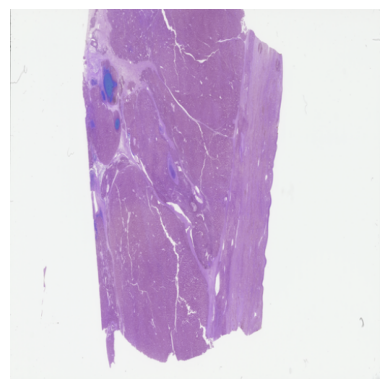

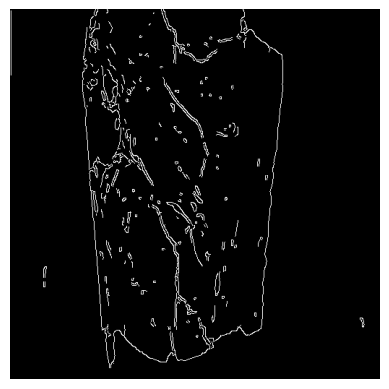

In [30]:
# img = cv.imread('/Users/zhangenzhi/work/gvit-1/dataset/paip/output_images_and_masks/128700-2019-01-00-03-01/rescaled_image_0_512x512.png')
# img = cv.imread('/Volumes/data/dataset/paip/output_images_and_masks/153100-2019-01-00-03-01/rescaled_image_0_512x512.png')
# img = cv.imread('/Volumes/data/dataset/miccai/rescale-images-16384/rescaled_image_0_16384x16384.png')
# img = cv.imread('/Volumes/data/dataset/test/n04525038_35823.JPEG')
# img = cv.imread('/Volumes/Extreme/dataset/paip/output_images_and_masks/128700-2019-01-00-03-01/rescaled_image_0_512x512.png')
img = cv.imread('/Volumes/Extreme/dataset/paip/output_images_and_masks/151100-2019-01-00-03-01/rescaled_image_0_512x512.png')
# img = cv.imread('/Users/zhangenzhi/work/apt/dataset/paip_image.png')
img = img[12:512,0:500,:]
img = cv.resize(img, (512,512))
print(img.shape)
grey_img = cv.GaussianBlur(img, (3,3), 0)
print(grey_img.shape)
edges = cv.Canny(grey_img, 100, 150)
print(edges.shape)

fig, ax = plt.subplots()
plt.imshow(img)
ax.axis("off")
plt.savefig("org_img.png",bbox_inches='tight')
plt.show()
plt.close()

fig, ax = plt.subplots()
plt.imshow(edges)
ax.imshow(edges, cmap = 'gray')
ax.axis("off")
plt.savefig("edges.png",bbox_inches='tight')
plt.show()
plt.close()

plt.show()

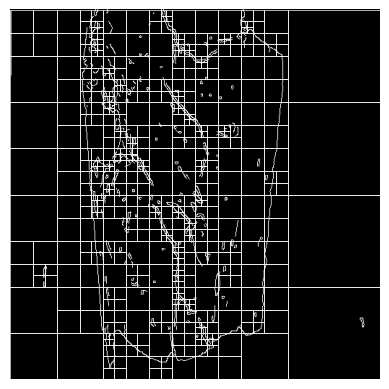

514


In [31]:
fig, ax = plt.subplots()
ax.imshow(edges, cmap = 'gray')
qdt = FixedQuadTree(domain=edges, fixed_length=514)
qdt.draw(ax=ax)
ax.axis('off')
plt.savefig("ap_512.png",bbox_inches='tight')
plt.show()
print(qdt.count_patches())
plt.close()

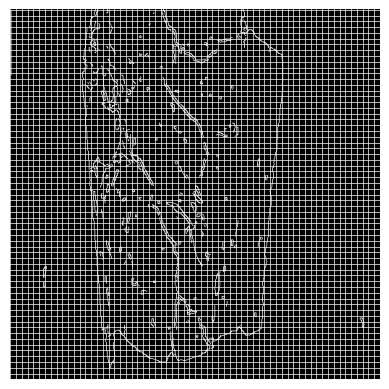

In [44]:

def draw_grid_on_image(img, grid_size=8, line_color='w', line_width=0.5):
    # Load the image
    img = img
    height, width = img.shape[:2]
    
    # Display the image
    plt.imshow(img,cmap = 'gray')
    
    # Draw vertical grid lines
    for x in range(0, width, grid_size):
        plt.axvline(x=x, color=line_color, linewidth=line_width)
    
    # Draw horizontal grid lines
    for y in range(0, height, grid_size):
        plt.axhline(y=y, color=line_color, linewidth=line_width)
    
        # Hide axis
    plt.axis('off')
    plt.savefig("grid-patch.png", bbox_inches='tight')
    
    # Show the image with grid
    plt.show()
draw_grid_on_image(edges)

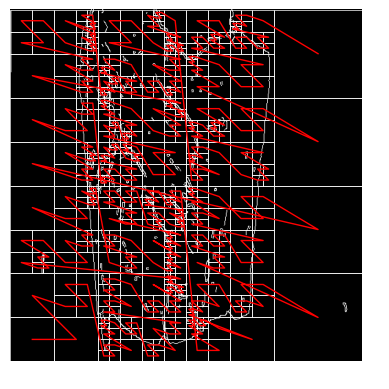

514


In [33]:
# Z-order plot
fig, ax = plt.subplots()
ax.imshow(edges, cmap = 'gray')
# qdt = FixedQuadTree(domain=edges, fixed_length=424)
ax.axis('off')
qdt.draw(ax=ax)
qdt.draw_zorder(ax=ax)
plt.savefig("z-order.png", bbox_inches='tight')
plt.show()
print(qdt.count_patches())
plt.close()

In [34]:
qdt.encode_nodes()

[[0, 64, 448, 512],
 [64, 128, 448, 512],
 [0, 64, 384, 448],
 [64, 96, 416, 448],
 [96, 128, 416, 448],
 [64, 96, 384, 416],
 [96, 128, 384, 416],
 [128, 144, 496, 512],
 [144, 160, 496, 512],
 [128, 144, 480, 496],
 [144, 160, 480, 496],
 [160, 192, 480, 512],
 [128, 144, 464, 480],
 [144, 160, 464, 480],
 [128, 136, 456, 464],
 [136, 144, 456, 464],
 [128, 136, 448, 456],
 [136, 144, 448, 456],
 [144, 160, 448, 464],
 [160, 176, 464, 480],
 [176, 192, 464, 480],
 [160, 176, 448, 464],
 [176, 192, 448, 464],
 [192, 208, 496, 512],
 [208, 224, 496, 512],
 [192, 208, 480, 496],
 [208, 224, 480, 496],
 [224, 256, 480, 512],
 [192, 224, 448, 480],
 [224, 240, 464, 480],
 [240, 256, 464, 480],
 [224, 240, 448, 464],
 [240, 256, 448, 464],
 [128, 144, 432, 448],
 [144, 160, 432, 448],
 [128, 144, 416, 432],
 [144, 160, 416, 432],
 [160, 192, 416, 448],
 [128, 144, 400, 416],
 [144, 160, 400, 416],
 [128, 144, 384, 400],
 [144, 160, 384, 400],
 [160, 192, 384, 416],
 [192, 208, 432, 448],
 

In [35]:
def patchify(mask, patch_size=8, channel=3):
    seq = qdt.serialize(mask, size=(patch_size, patch_size, channel))
    return seq

def depatchify(seq, patch_size=8, channel=3):
    # mask = np.zeros(shape=(512, 512, 3))
    mask = qdt.deserialize(seq, patch_size=patch_size, channel=channel)
    return mask

# mask=img
# seq = patchify(mask=mask)

# fig, ax = plt.subplots()
# mask= depatchify(seq=np.asarray(seq), channel=3)
# mask = mask.astype(np.uint8)
# ax.imshow(mask, cmap = 'gray')
# plt.show()
# plt.close()

In [7]:
# np.asarray(seq).shape

(512, 512, 3)
(514, 8, 8, 3)
de mask: (512, 512, 3)


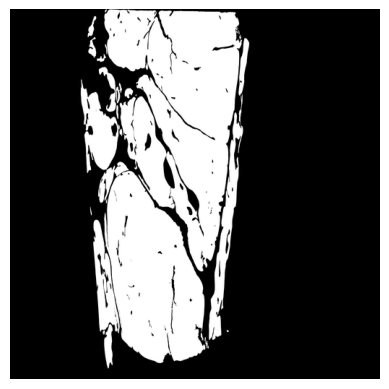

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


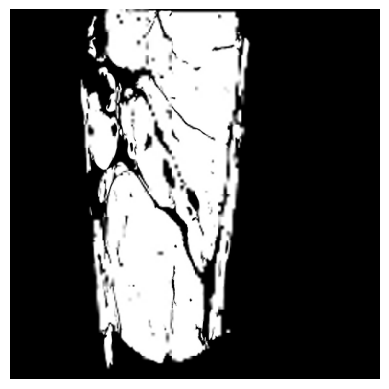

In [36]:
# mask = cv.imread('/Volumes/Extreme/dataset/paip/output_images_and_masks/128700-2019-01-00-03-01/rescaled_mask_0_512x512.png')
mask = cv.imread('/Volumes/Extreme/dataset/paip/output_images_and_masks/151100-2019-01-00-03-01/rescaled_mask_0_512x512.png')
# mask = cv.imread('/Volumes/data/dataset/miccai/rescale-masks-16384/rescaled_image_0_16384x16384.png')
# mask = cv.imread('/Volumes/data/dataset/paip/output_images_and_masks/153100-2019-01-00-03-01/rescaled_mask_0_512x512.png')
# mask = cv.imread('/Users/zhangenzhi/work/gvit-1/dataset/paip/output_images_and_masks/128700-2019-01-00-03-01/rescaled_mask_0_512x512.png')
# mask = cv.imread('/Users/zhangenzhi/work/apt/dataset/paip_mask.png')
img = img[12:512,0:500,:]
mask = cv.resize(mask, (512, 512))
# mask = mask[:,:,0]
mask = mask.reshape((512, 512, 3))
print(mask.shape)

seq = patchify(mask=mask, patch_size=8, channel=3)
print(np.asarray(seq).shape)
recon_mask= depatchify(seq=seq, patch_size=8, channel=3)
recon_mask = recon_mask.astype(int)


fig, ax = plt.subplots()
plt.imshow(mask)
ax.axis("off")
plt.savefig("org_mask.png",bbox_inches='tight')
plt.show()
plt.close()

fig, ax = plt.subplots()
plt.imshow(recon_mask)
ax.imshow(recon_mask, cmap = 'gray')
ax.axis("off")
plt.savefig("recon_mask.png",bbox_inches='tight')
plt.show()
plt.close()


In [9]:
mask.shape

(512, 512, 3)

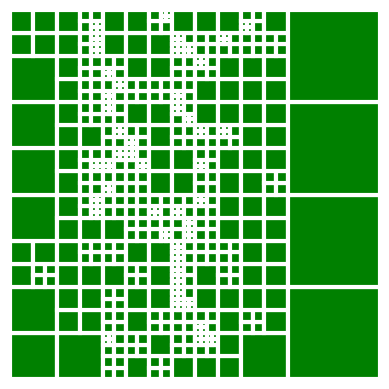

514


In [37]:
# Area plot
canvas = np.zeros([512,512,3],dtype=np.uint8)
canvas.fill(255) # or img[:] = 255

fig, ax = plt.subplots()
ax.imshow(canvas, cmap = 'gray')
qdt.draw_area(ax=ax, lw=3)
# Hide the axes
ax.axis('off')
plt.savefig("gr-patches.png",bbox_inches='tight')
plt.show()
print(qdt.count_patches())
plt.close()

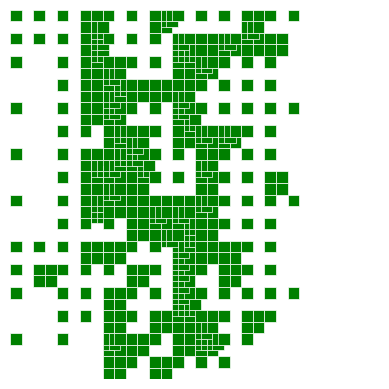

514


In [42]:
# Rescale plot
canvas = np.zeros([512,512,3],dtype=np.uint8)
canvas.fill(255) # or img[:] = 255

fig, ax = plt.subplots()
ax.imshow(canvas, cmap = 'gray')
qdt.draw_rescale(ax=ax, lw=0.5)
# Hide the axes
ax.axis('off')
plt.savefig("gr-eq.png", bbox_inches='tight')
plt.show()
print(qdt.count_patches())
plt.close()